## **IMPORTES**

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Pre-processing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **INTEGRAÇÃO DE DADOS**

In [2]:
train = pd.read_csv(filepath_or_buffer="../data/train.csv")
test = pd.read_csv(filepath_or_buffer="../data/test.csv")
df = pd.concat(objs=[train, test], axis=0, ignore_index=True, copy=True)

## **AMOSTRAGEM DE DADOS**

In [3]:
df.drop(columns=['pctsomecol18_24', 'binnedinc', 'geography'], inplace=True)

In [4]:
X = df.drop(columns=['target_deathrate'])
y = df['target_deathrate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [5]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(2437,)
(2437, 30)
(610,)
(610, 30)


## **VALORES FALTANTES**

In [6]:
pd.DataFrame(data={
    "Percentual (%)": round((X_train.isnull().sum()[(X_train.isnull().sum() > 0)] / X_train.shape[0]) * 100, 2),
    "Quantidade": X_train.isnull().sum()[(X_train.isnull().sum() > 0)]
})

,Percentual (%),Quantidade
pctemployed16_over,4.80,117
pctprivatecoveragealone,19.98,487


In [7]:
X_train['pctemployed16_over'] = X_train['pctemployed16_over'].fillna(value=X_train['pctemployed16_over'].mean())
X_train['pctprivatecoveragealone'] = X_train['pctprivatecoveragealone'].fillna(value=X_train['pctprivatecoveragealone'].mean())

In [8]:
pd.DataFrame(data={
    "Percentual (%)": round((X_test.isnull().sum()[(X_test.isnull().sum() > 0)] / X_test.shape[0]) * 100, 2),
    "Quantidade": X_test.isnull().sum()[(X_test.isnull().sum() > 0)]
})

,Percentual (%),Quantidade
pctemployed16_over,5.74,35
pctprivatecoveragealone,20.00,122


In [9]:
X_test['pctemployed16_over'] = X_test['pctemployed16_over'].fillna(value=X_test['pctemployed16_over'].mean())
X_test['pctprivatecoveragealone'] = X_test['pctprivatecoveragealone'].fillna(value=X_test['pctprivatecoveragealone'].mean())

## **NORMALIZAÇÃO COLUNA ALVO**

In [10]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

<Axes: xlabel='target_deathrate', ylabel='Count'>

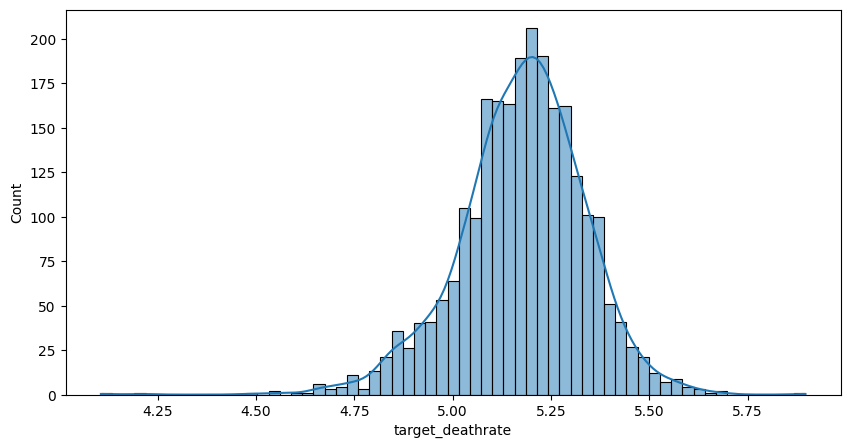

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data=y_train, kde=True)

<Axes: xlabel='target_deathrate', ylabel='Count'>

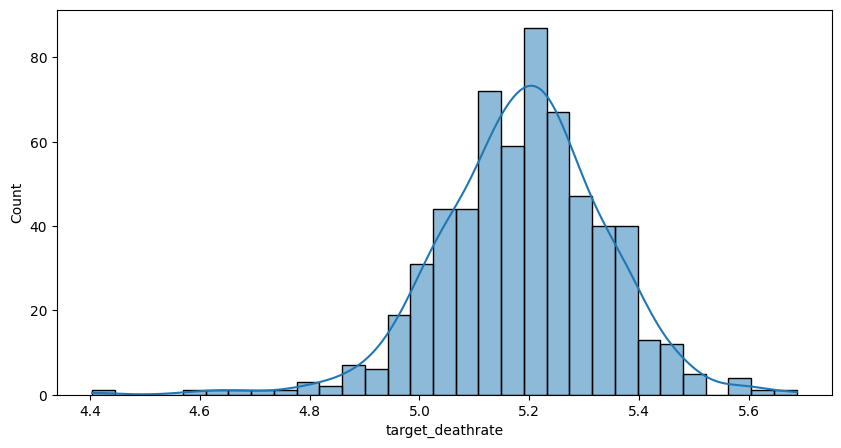

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data=y_test, kde=True)

## **PADRONIZAÇÃO DOS DADOS**


### $z_{score} = \frac{x - x_{media}}{x_{std}}$

In [13]:
scaler = StandardScaler()
scaler.fit(X=X_train)

X_train = scaler.transform(X=X_train)
X_test = scaler.transform(X=X_test)

## **PERSISTINDO DADOS**

In [14]:
train = pd.DataFrame(data=X_train, columns=df.drop(columns=['target_deathrate']).columns)
train['target_deathrate'] = y_train.to_list()
train.to_csv(path_or_buf='../data/train_process.csv', index=False)
train

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,0.024901,0.178175,-0.037373,-0.365933,0.022183,-0.155316,-0.141923,-0.050089,0.470512,0.473101,...,0.247896,0.372368,0.451190,-0.023019,-0.356127,-0.354490,-0.446488,-0.049464,-0.032005,5.189060
1,-0.447315,-0.381565,-1.008479,0.674285,-0.320013,-0.852010,-0.284446,-0.333984,-2.435158,-1.802033,...,1.254253,-1.368986,-1.013835,-0.023308,-0.467040,-0.377232,0.218780,2.496006,-0.031184,4.926529
2,-0.413700,-0.349839,-0.102964,-0.923769,-0.308394,0.758127,-0.284446,-0.103857,-0.061244,0.097046,...,-1.319903,0.906214,1.004644,-0.032003,-0.266017,-0.286351,-0.391974,0.141765,-0.033793,5.028475
3,-0.408898,-0.320379,0.512859,-1.080973,-0.307054,1.439338,0.374771,-0.118912,-0.346114,-0.090982,...,-0.747868,0.308815,0.923254,-0.039800,1.645599,-0.470029,-0.567323,-0.828625,-0.025497,5.374815
4,-0.461722,-0.386097,-3.428044,0.238866,-0.335192,1.718016,-0.284446,-0.131816,-0.194184,-0.429431,...,-0.949140,0.080024,0.565136,-0.027419,-0.222179,-0.462120,1.257590,0.771583,-0.050953,5.110782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,-0.428907,-0.340774,-1.365583,-1.083127,-0.324205,0.742645,-0.284446,0.089708,1.818895,1.582464,...,-1.256343,0.893503,-0.004596,-0.022733,-0.411453,-0.383602,-0.467484,-0.029096,-0.041147,5.191845
2433,-0.390489,-0.311314,-0.501974,-0.963940,-0.266315,1.547713,-0.284446,-0.379149,-2.245245,-2.685763,...,1.000015,-1.127484,-0.981279,-0.023756,-0.368195,0.449391,-0.526650,-1.229855,-0.041386,5.097424
2434,-0.460922,-0.397428,1.343673,-0.064776,-0.349939,-0.341101,-0.284446,0.027337,1.116217,1.356831,...,0.841117,-0.987667,-1.160338,-0.021523,-0.472374,-0.419523,-0.481492,0.910501,-0.036681,4.969813
2435,-0.393691,-0.299983,-0.015510,-0.102379,-0.318666,-0.495922,-0.284446,0.216600,2.616530,2.823447,...,-0.927953,0.842661,-0.606884,-0.033894,0.940583,-0.102471,-0.551848,-1.047021,-0.039363,5.255410


In [15]:
test = pd.DataFrame(data=X_test, columns=df.drop(columns=['target_deathrate']).columns)
test['target_deathrate'] = y_test.to_list()
test.to_csv(path_or_buf='../data/test_process.csv', index=False)
test

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,0.328239,0.486372,0.973815,-0.187442,0.301240,-0.201763,-0.253607,-0.123213,-0.251158,-0.222601,...,-0.959733,0.003761,0.060517,-0.028647,0.070652,0.310975,-0.399046,-0.582571,-0.033898,5.260096
1,0.821265,1.132226,0.334307,-0.960378,1.056671,1.702534,0.693186,-0.217845,-0.934845,-1.143936,...,-0.578377,0.168998,1.069756,-0.049036,2.530316,0.698924,-0.168795,-3.702843,-0.036179,5.270946
2,-0.249625,-0.211603,2.363972,0.556588,-0.209526,-0.712671,-0.284446,-0.095254,0.033712,0.191060,...,1.169507,-0.263162,-0.509215,-0.024503,-0.183744,-0.320995,-0.432752,0.102617,-0.037387,5.204556
3,-0.430508,-0.358903,2.063348,-1.780857,-0.327005,3.622313,-0.284446,-0.219996,-1.390636,-0.880698,...,-1.881344,2.177275,3.348684,-0.054024,3.330260,-0.442939,-0.360203,-3.666295,-0.020901,5.402227
4,-0.325660,-0.225200,-1.094111,0.473928,-0.182568,-0.000496,0.563653,-0.215694,-0.972827,-1.049923,...,-0.228800,-0.466532,0.207019,-0.024528,-0.432821,-0.364059,0.634003,0.312621,-0.034559,5.136386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.594761,0.880683,-0.070169,0.933449,0.811890,-0.403030,-0.214911,-0.172680,-0.630984,-0.655065,...,0.925862,-1.356275,-0.867333,-0.030417,0.198889,0.811540,0.142798,-0.015548,-0.035420,5.258536
606,-0.283240,-0.184409,0.352526,0.263466,-0.210496,-0.604297,1.411063,-0.142570,-0.403088,-0.260206,...,0.671625,0.143577,-0.020874,-0.027649,-0.385082,0.646076,2.104361,0.591188,-0.026399,5.203457
607,-0.381685,-0.284120,0.891827,-1.388508,-0.293415,1.733498,-0.284446,-0.028582,0.584460,0.567115,...,-1.796598,2.151854,2.241776,-0.021887,-0.464218,-0.366296,-0.482043,-0.024650,-0.036205,5.446306
608,-0.295246,-0.184409,-0.161267,-1.031112,-0.203892,0.758127,-0.284446,-0.121062,-0.175192,-0.147390,...,-0.387698,0.105445,0.239575,-0.023093,-0.376468,-0.304550,-0.304646,0.433570,-0.026505,5.238036
